# <div align="center"><span style="color:Purple">**<i>Time Series Analysis of Daily Electricity Consumption</i>**</span> </div>

In [178]:
import pandas as pd
import numpy as np

###### sep for tap "/t" 
###### "#"
###### to.csv(name of the file,specify the sperator)

In [179]:
path = r"data\household_power_consumption.txt"
df = pd.read_csv(path, sep=';', low_memory=False)
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [181]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [182]:
df.index

RangeIndex(start=0, stop=2075259, step=1)

##### <span style="color:darkred">need first to combine the date and the time together as in this table they are seperate</span>
##### <span style="color:darkred">since the time and the date are seperate the pandas  needs a single datetime object to use time-based functions</span> 

In [183]:
df['DateTime']=pd.to_datetime(df['Date'] + ' '+df['Time'], format='%d/%m/%Y %H:%M:%S')

#### <span style='color: darkred'>Set DateTime as index</span>

In [184]:
df= df.set_index('DateTime')   #set date time as an index

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 158.3+ MB


In [186]:
df.index

DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00', '2006-12-16 17:29:00',
               '2006-12-16 17:30:00', '2006-12-16 17:31:00',
               '2006-12-16 17:32:00', '2006-12-16 17:33:00',
               ...
               '2010-11-26 20:53:00', '2010-11-26 20:54:00',
               '2010-11-26 20:55:00', '2010-11-26 20:56:00',
               '2010-11-26 20:57:00', '2010-11-26 20:58:00',
               '2010-11-26 20:59:00', '2010-11-26 21:00:00',
               '2010-11-26 21:01:00', '2010-11-26 21:02:00'],
              dtype='datetime64[ns]', name='DateTime', length=2075259, freq=None)

In [187]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [188]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,,,
2010-11-26 20:58:00,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2010-11-26 20:59:00,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2010-11-26 21:00:00,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2010-11-26 21:01:00,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0
2010-11-26 21:02:00,26/11/2010,21:02:00,0.932,0.000,239.550,3.800,0.000,0.000,0.0


In [189]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

##### <span style='color:darkred'>to shows the earliest and latest dates in my data frame</span>

In [190]:
print(df.index.min())
print(df.index.max())

2006-12-16 17:24:00
2010-11-26 21:02:00


###### slice of the df(Slice by specific date)

In [191]:
d=df.loc['15-05-2007']
d

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,,,
2007-05-15 00:00:00,15/5/2007,00:00:00,0.516,0.286,235.990,2.400,0.000,1.000,0.0
2007-05-15 00:01:00,15/5/2007,00:01:00,0.514,0.286,235.980,2.400,0.000,1.000,0.0
2007-05-15 00:02:00,15/5/2007,00:02:00,0.482,0.248,236.260,2.200,0.000,2.000,0.0
2007-05-15 00:03:00,15/5/2007,00:03:00,0.418,0.164,236.900,1.800,0.000,1.000,0.0
2007-05-15 00:04:00,15/5/2007,00:04:00,0.414,0.158,235.560,1.800,0.000,1.000,0.0
...,...,...,...,...,...,...,...,...,...
2007-05-15 23:55:00,15/5/2007,23:55:00,1.260,0.056,238.310,5.200,0.000,0.000,18.0
2007-05-15 23:56:00,15/5/2007,23:56:00,1.260,0.056,238.420,5.200,0.000,0.000,17.0
2007-05-15 23:57:00,15/5/2007,23:57:00,1.262,0.056,238.610,5.200,0.000,0.000,18.0


###### <span style='color:darkred'>if we want to specify the slice</span>
###### <span style='color:darkred'>Data from 10 November 2009 to 10 December 2009</span>

In [192]:
range_of_date=df.loc['10-11-2009':'10-12-2009']
range_of_date


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,,,
2009-10-11 00:00:00,11/10/2009,00:00:00,0.392,0.228,243.320,1.800,0.000,0.000,0.0
2009-10-11 00:01:00,11/10/2009,00:01:00,0.392,0.226,242.830,1.800,0.000,0.000,1.0
2009-10-11 00:02:00,11/10/2009,00:02:00,0.392,0.228,243.340,1.800,0.000,0.000,1.0
2009-10-11 00:03:00,11/10/2009,00:03:00,0.390,0.224,242.530,1.800,0.000,0.000,0.0
2009-10-11 00:04:00,11/10/2009,00:04:00,0.390,0.224,242.560,1.800,0.000,0.000,1.0
...,...,...,...,...,...,...,...,...,...
2009-10-12 23:55:00,12/10/2009,23:55:00,0.306,0.060,243.080,1.400,0.000,0.000,0.0
2009-10-12 23:56:00,12/10/2009,23:56:00,0.348,0.124,243.400,1.600,0.000,0.000,1.0
2009-10-12 23:57:00,12/10/2009,23:57:00,0.456,0.270,242.620,2.200,0.000,1.000,1.0


In [193]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 158.3+ MB


### <span style='color:darkred'>for the plot we need to convert the data type from object to float(number)</span>

In [207]:
df['Global_active_power']=df['Global_active_power'].replace('?', np.nan)  #to replace all occurrences of ? in the  DataFrame with NaN (missing value).
                                                                          # so we need to replace it because pandas reads (? )as a string(object)
df['Global_active_power']=df['Global_active_power'].astype('float64')

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(2), object(7)
memory usage: 158.3+ MB


In [197]:
df['Global_active_power']

DateTime
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
                       ...  
2010-11-26 20:58:00    0.946
2010-11-26 20:59:00    0.944
2010-11-26 21:00:00    0.938
2010-11-26 21:01:00    0.934
2010-11-26 21:02:00    0.932
Name: Global_active_power, Length: 2075259, dtype: float64

### <span style='color:darkred'>resamble for data time seies</span>

###### <span style='color:lightcoral'>Resample weekly and compute average</span>

In [198]:
weekly=df['Global_active_power'].resample('W').mean()
weekly

DateTime
2006-12-17    2.505248
2006-12-24    1.734186
2006-12-31    1.958376
2007-01-07    1.484233
2007-01-14    1.604954
                ...   
2010-10-31    0.958963
2010-11-07    1.154565
2010-11-14    1.335928
2010-11-21    1.107106
2010-11-28    1.186756
Freq: W-SUN, Name: Global_active_power, Length: 207, dtype: float64

###### <span style='color:lightcoral'>Resample Monthly and compute average</span>

In [199]:
monthly=df['Global_active_power'].resample('M').mean()
monthly

C:\Users\bbuser\AppData\Local\Temp\ipykernel_16048\3284726792.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly=df['Global_active_power'].resample('M').mean()


DateTime
2006-12-31    1.901295
2007-01-31    1.546034
2007-02-28    1.401084
2007-03-31    1.318627
2007-04-30    0.891189
2007-05-31    0.985862
2007-06-30    0.826814
2007-07-31    0.667367
2007-08-31    0.764186
2007-09-30    0.969318
2007-10-31    1.103911
2007-11-30    1.294473
2007-12-31    1.626474
2008-01-31    1.459920
2008-02-29    1.181384
2008-03-31    1.245337
2008-04-30    1.115972
2008-05-31    1.024281
2008-06-30    0.994096
2008-07-31    0.794781
2008-08-31    0.276488
2008-09-30    0.987680
2008-10-31    1.136768
2008-11-30    1.387066
2008-12-31    1.275189
2009-01-31    1.410202
2009-02-28    1.247568
2009-03-31    1.226735
2009-04-30    1.140690
2009-05-31    1.012856
2009-06-30    0.840756
2009-07-31    0.618121
2009-08-31    0.664619
2009-09-30    0.986841
2009-10-31    1.144486
2009-11-30    1.274743
2009-12-31    1.364421
2010-01-31    1.430525
2010-02-28    1.375855
2010-03-31    1.130075
2010-04-30    1.027295
2010-05-31    1.095284
2010-06-30    0.969615
20

###### <span style='color:lightcoral'>Resample daily and compute average</span>

In [200]:
Daily=df['Global_active_power'].resample('D').mean()
Daily

DateTime
2006-12-16    3.053475
2006-12-17    2.354486
2006-12-18    1.530435
2006-12-19    1.157079
2006-12-20    1.545658
                ...   
2010-11-22    1.417733
2010-11-23    1.095511
2010-11-24    1.247394
2010-11-25    0.993864
2010-11-26    1.178230
Freq: D, Name: Global_active_power, Length: 1442, dtype: float64

##### Plots

In [201]:
import matplotlib.pyplot as plt


###### <span style='color:darkred'>to check if the Global_active_power has converted to float </span>

In [202]:
df.dtypes  

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

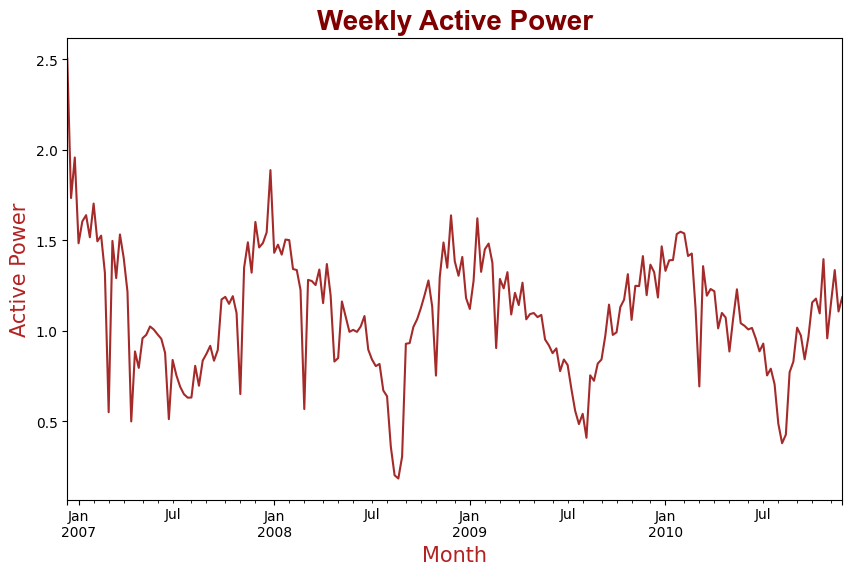

In [203]:
plt.figure(figsize=(10, 6))
weekly.plot(color ="brown")
plt.title('Weekly Active Power',fontsize = 20 ,color='maroon', fontweight='bold', fontname='Arial') # Set custom title 
plt.xlabel('Month',fontsize = 15 , color ="firebrick")
plt.ylabel('Active Power',fontsize = 15 , color ="firebrick")
plt.show()

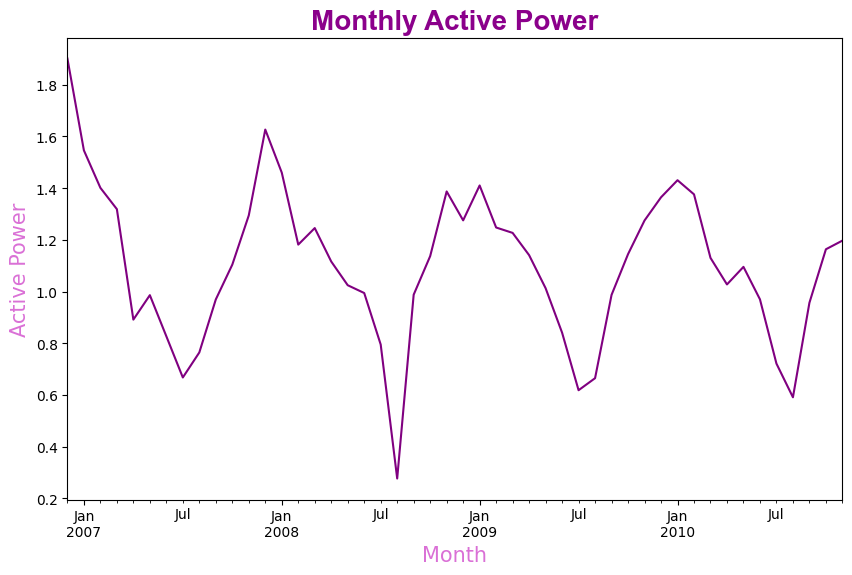

In [204]:
plt.figure(figsize=(10, 6))
monthly.plot(color ="Purple")
plt.title('Monthly Active Power',fontsize=20, color='darkmagenta', fontweight='bold', fontname='Arial')
plt.xlabel('Month',fontsize = 15 , color ="orchid")
plt.ylabel('Active Power',fontsize = 15, color ="orchid")
plt.show()

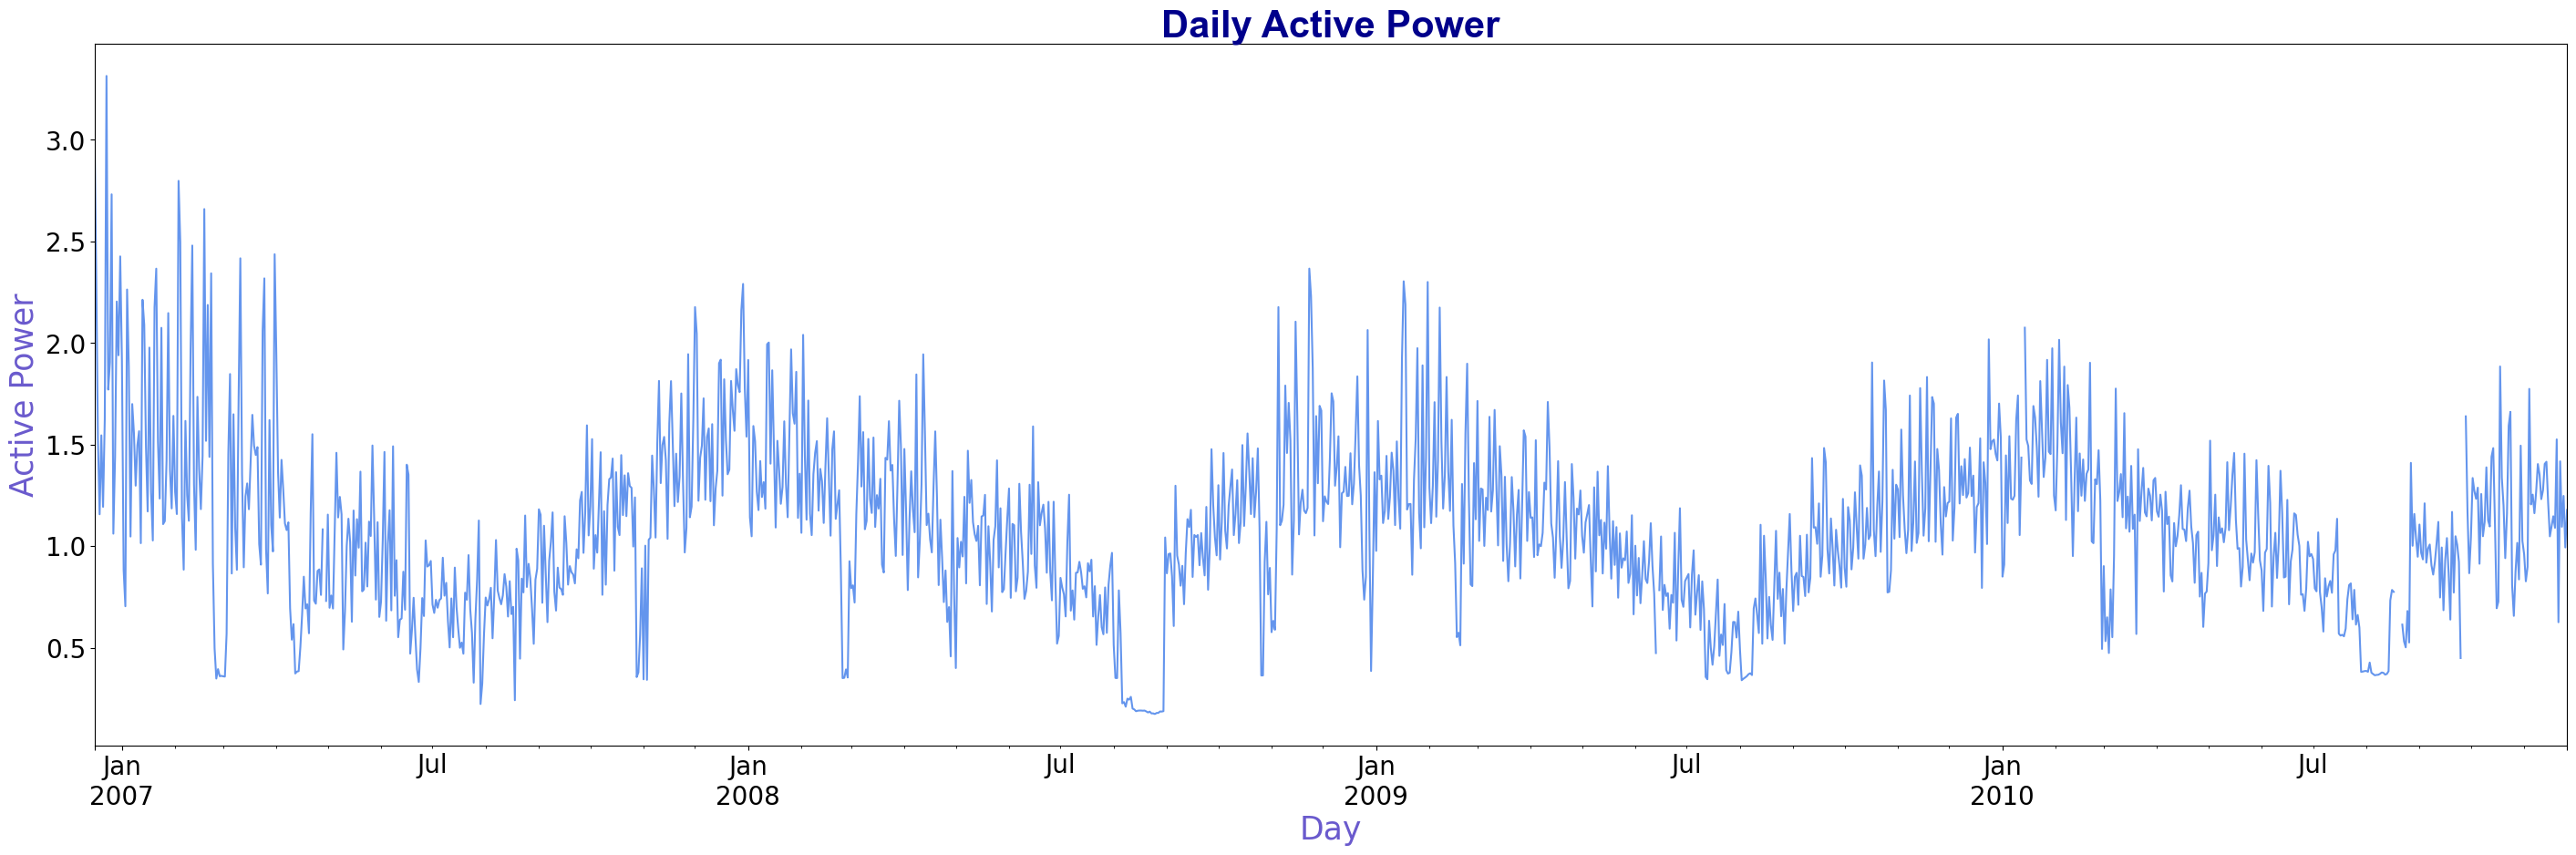

In [205]:
plt.figure(figsize=(35, 10))
#Daily.plot(title='Daily Active Power',fontsize = 18, color ="cornflowerblue")
# Plot the data
Daily.plot(color="cornflowerblue",fontsize= 20)
plt.title('Daily Active Power', fontsize= 30, color='darkblue', fontweight='bold', fontname='Arial')# Set custom title
plt.xlabel('Day',fontsize = 25 , color ="Slateblue")
plt.ylabel('Active Power',fontsize = 25 , color ="Slateblue")
plt.show()